<a href="https://colab.research.google.com/github/degroen/neural/blob/task2_2/neural1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

%matplotlib inline

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/2
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6063 - accuracy: 0.8737
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.9283


[0.34554439783096313, 0.9283000230789185]

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
def display_digit(num):
    label = y_train[num]
    image = x_train[num]
    plt.title('Example: {}  Label: {}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

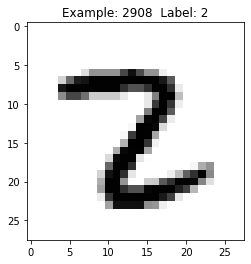

In [ ]:
display_digit(2908)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.0),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9220
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1235 - accuracy: 0.9645
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0872 - accuracy: 0.9736


In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9707
Loss = 0.09618350863456726, accuracy = 0.9707000255584717


In [ ]:
predictions = list(map(round, np.array(model.predict(x_test[0:1,:,:])[0])*100))
print(predictions)
print(y_test[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
7


In [ ]:
def fit_model(x_train, y_train, x_test, y_test):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=2)
  model.evaluate(x_test, y_test)
  return model

In [ ]:
# benchmark
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = fit_model(x_train, y_train, x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2201 - accuracy: 0.9356
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9763


In [ ]:
# without normalization
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
model = fit_model(x_train, y_train, x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6612 - accuracy: 0.8785
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.3120 - accuracy: 0.9344


In [ ]:
# normalized data in non-normalized model
x_train, x_test = x_train / 255.0, x_test / 255.0
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2267 - accuracy: 0.0984


[2.2266597747802734, 0.09839999675750732]

In [ ]:
# non-normilized data in normilized model
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = fit_model(x_train, y_train, x_test, y_test)
x_train, x_test = x_train * 255.0, x_test * 255.0
model.evaluate(x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2217 - accuracy: 0.9341
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 11.2519 - accuracy: 0.9758


[11.251864433288574, 0.9757999777793884]

In [ ]:
# tensorflow normalization
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = tf.keras.utils.normalize(x_train), tf.keras.utils.normalize(x_test)
model = fit_model(x_train, y_train, x_test, y_test)

Epoch 1/2
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2542 - accuracy: 0.9251
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9715


In [3]:
#benchmark
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = tf.keras.utils.normalize(x_train), tf.keras.utils.normalize(x_test)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2)
model.evaluate(x_test, y_test)
model.summary()

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/2
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2541 - accuracy: 0.9255
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9719
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________

In [146]:
# for ep in [7, 8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(35, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.05),
  tf.keras.layers.Dense(80, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=8)
model.evaluate(x_test, y_test)
model.summary()


Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3997 - accuracy: 0.8801
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1989 - accuracy: 0.9392
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1576 - accuracy: 0.9524
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1367 - accuracy: 0.9576
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1217 - accuracy: 0.9624
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1106 - accuracy: 0.9653
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1017 - accuracy: 0.9676
Epoch 8/8
313/313 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9716
Model: "sequential_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_253 (Flatten)        (None, 78